In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

In [2]:
# check for gpu
tf.test.gpu_device_name()

2022-07-26 21:15:00.286825: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-26 21:15:00.351167: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 21:15:00.471288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 21:15:00.472036: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

'/device:GPU:0'

## Loading dataset

In [3]:
birds_dataset = r'../input/100-bird-species'

train_path = os.path.join(birds_dataset, 'train')
test_path = os.path.join(birds_dataset, 'test')
validation_path = os.path.join(birds_dataset, 'valid')


# some image properties
img_height = 128
img_width = 128


In [4]:
# using tensorflow imagedatagenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the datagens
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# generator from directory

train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width),
                                                    batch_size=32,class_mode='categorical',
                                                    color_mode='rgb',seed = 42,
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory(validation_path, target_size=(img_height, img_width),
                                                batch_size=32,class_mode='categorical',
                                                color_mode='rgb',seed = 42,
                                                shuffle=True)

test_generator = test_datagen.flow_from_directory(test_path, target_size=(img_height, img_width),
                                                  batch_size=32,class_mode='categorical',
                                                  color_mode='rgb',shuffle=True,
                                                  seed = 42)


Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


Using this method takes it really easy on the RAM and this allows us to be able to load all images in the train dataset easily without filling the RAM and we can easily visualize what has been done

In [5]:
for images_batch, labels_batch in train_generator:
    print(images_batch.shape)
    print(labels_batch.shape)
    
    break

(32, 128, 128, 3)
(32, 400)


(32, 128, 128, 3)
(128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

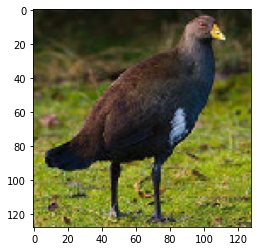

In [6]:
batch=next(train_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
print(batch[1][0]) # the class this image got classified into
plt.imshow(img) 

(32, 128, 128, 3)
(128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

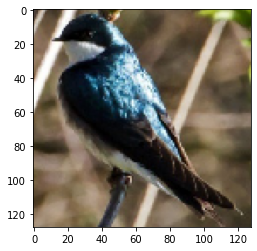

In [7]:
batch=next(test_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
print(batch[1][0]) # the class this image got classified into
plt.imshow(img)

(32, 128, 128, 3)
(128, 128, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 

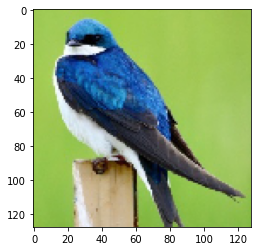

In [8]:
batch=next(val_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
print(batch[1][0]) # the class this image got classified into
plt.imshow(img)

All good. Ready to train

# ML Models

## Baseline Model

In [9]:
num_categories = 400 # we have 400 classes

In [10]:
input_shape = batch[0].shape[1:]
input_shape

(128, 128, 3)

In [11]:
model = models.Sequential(name='baseline_birds')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_categories, activation='softmax'))

2022-07-26 21:15:46.102968: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 21:15:46.103815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 21:15:46.104453: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 21:15:46.105307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 21:15:46.105961: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [12]:
model.summary()

Model: "baseline_birds"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)          

In [13]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_baseline.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [14]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

2022-07-26 21:16:09.124051: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-26 21:16:10.671420: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 36s 288ms/step - loss: 5.9673 - acc: 0.0056 - val_loss: 5.8464 - val_acc: 0.0094
Epoch 2/100
100/100 [==============================] - 23s 227ms/step - loss: 5.7162 - acc: 0.0141 - val_loss: 5.4932 - val_acc: 0.0256
Epoch 3/100
100/100 [==============================] - 21s 208ms/step - loss: 5.3204 - acc: 0.0437 - val_loss: 4.9965 - val_acc: 0.0587
Epoch 4/100
100/100 [==============================] - 20s 201ms/step - loss: 4.9621 - acc: 0.0625 - val_loss: 4.6476 - val_acc: 0.0825
Epoch 5/100
100/100 [==============================] - 20s 195ms/step - loss: 4.6138 - acc: 0.0950 - val_loss: 4.3784 - val_acc: 0.1187
Epoch 6/100
100/100 [==============================] - 19s 194ms/step - loss: 4.3742 - acc: 0.1319 - val_loss: 4.0501 - val_acc: 0.1756
Epoch 7/100
100/100 [==============================] - 18s 184ms/step - loss: 4.0642 - acc: 0.1691 - val_loss: 3.8251 - val_acc: 0.1969
Epoch 8/100
100/100 [==============================] - 18s 1

Early stopping kicked in and it stopped at 80 epochs.



### Evaluating the performance

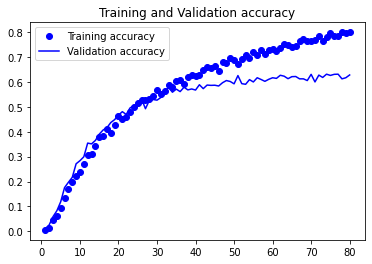

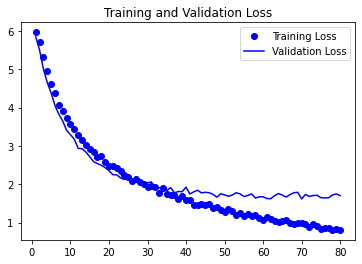

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

We can see a little bit of overfitting starting to happen on the train set

In [16]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 10s 192ms/step - loss: 1.4841 - acc: 0.6438
test acc:  64.38 %


In [17]:
import gc
del model

gc.collect()

3914

Let's increase the complexity of the model and then train again on the dataset

## Model 2 - using Image Data Augmentation

In [18]:
# create the datagen
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = False)


# for every file in the train directory

train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True, seed = 42)

Found 58388 images belonging to 400 classes.


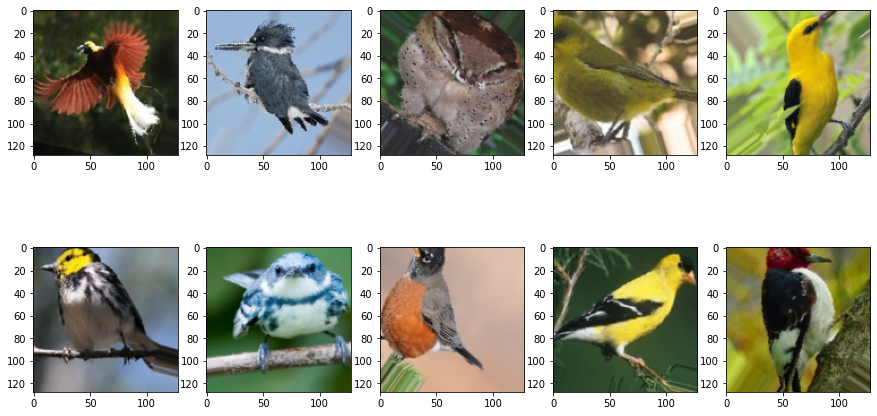

In [19]:
# let's visualize what just happened

# create the plot
plt.figure(figsize=(15, 8))


for i in range(10):
  # create 10 subplots
  plt.subplot(2, 5, i+1)
  batch = next(train_generator)
  
  # batch[0] represents images, and batch[1] represent labels
  image = batch[0][i]
  plt.imshow(image)


plt.show()

In [20]:
# let's train the model
model = models.Sequential(name='image_augment_birds')
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_categories, activation='softmax'))

In [21]:
model.summary()

Model: "image_augment_birds"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)     

In [22]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_baseline.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [23]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
100/100 [==============================] - 21s 207ms/step - loss: 5.9885 - acc: 0.0038 - val_loss: 5.9377 - val_acc: 0.0037
Epoch 2/100
100/100 [==============================] - 20s 197ms/step - loss: 5.8461 - acc: 0.0075 - val_loss: 5.7062 - val_acc: 0.0144
Epoch 3/100
100/100 [==============================] - 20s 203ms/step - loss: 5.6364 - acc: 0.0134 - val_loss: 5.4202 - val_acc: 0.0200
Epoch 4/100
100/100 [==============================] - 20s 203ms/step - loss: 5.3957 - acc: 0.0272 - val_loss: 5.1077 - val_acc: 0.0456
Epoch 5/100
100/100 [==============================] - 20s 197ms/step - loss: 5.2000 - acc: 0.0384 - val_loss: 4.9032 - val_acc: 0.0644
Epoch 6/100
100/100 [==============================] - 20s 201ms/step - loss: 5.0165 - acc: 0.0519 - val_loss: 4.7044 - val_acc: 0.0850
Epoch 7/100
100/100 [==============================] - 21s 209ms/step - loss: 4.8234 - acc: 0.0650 - val_loss: 4.4975 - val_acc: 0.0906
Epoch 8/100
100/100 [===========================

From what we see, this did even worse than the baseline model. So this has been a failure. Let's explore other ways to achieve a better result

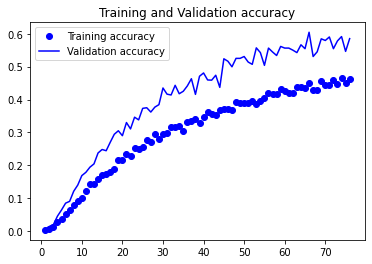

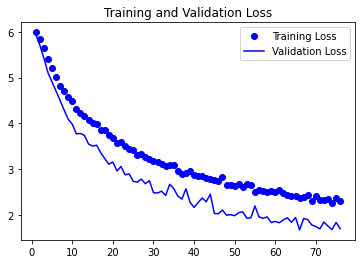

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [25]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 6s 111ms/step - loss: 1.5182 - acc: 0.6175
test acc:  61.75 %


Again, we did worse than the baseline model here.

In [26]:
model.save('image_augment_birds.h5')


## Model 3 - Using a pretrained model by Feature Extraction with Data Augmentation


In this method, We use the pretrained network (conv_base), add Dense layers for our classifier on top of it and run the whole thing together.

In [27]:
# let's load the VGG16 model trained on the imagenet dataset
from tensorflow.keras.applications import VGG16

# include top is false so as not to include the Dense classifiers of ImageNet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [29]:
model = models.Sequential()
model.add(conv_base) # add the pretrained network
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_categories, activation='softmax'))

In [30]:
# when learning to to classify into our categories, we need to ensure that the conv_base doesn't train, so we freeze it

conv_base.trainable = False

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 400)               2

In [32]:
# our augmentation code again
# remember not to augment validation set

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = False)


# for every file in the directory
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    shuffle=True, seed = 42)
                                              
  

Found 58388 images belonging to 400 classes.


In [33]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birdsfeature_extract.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=100, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
100/100 [==============================] - 22s 206ms/step - loss: 6.0493 - acc: 0.0041 - val_loss: 5.9915 - val_acc: 0.0031
Epoch 2/100
100/100 [==============================] - 20s 204ms/step - loss: 5.9903 - acc: 0.0034 - val_loss: 5.9919 - val_acc: 0.0025
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 5.9904 - acc: 0.0034 - val_loss: 5.9928 - val_acc: 0.0031
Epoch 4/100
100/100 [==============================] - 20s 205ms/step - loss: 5.9892 - acc: 0.0041 - val_loss: 5.9919 - val_acc: 0.0025
Epoch 5/100
100/100 [==============================] - 21s 209ms/step - loss: 5.9895 - acc: 0.0034 - val_loss: 5.9928 - val_acc: 0.0025
Epoch 6/100
100/100 [==============================] - 21s 205ms/step - loss: 5.9873 - acc: 0.0022 - val_loss: 5.9934 - val_acc: 0.0025
Epoch 7/100
100/100 [==============================] - 21s 207ms/step - loss: 5.9873 - acc: 0.0044 - val_loss: 5.9954 - val_acc: 0.0019
Epoch 8/100
100/100 [===========================

Unsurprisingly, we have a poor result from this data augmentation step as well. We'll investigate on the data augmentation step later to investigate what happened.

In [35]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 4s 83ms/step - loss: 5.9916 - acc: 0.0025
test acc:  0.25 %


## Model 4 - Finetuning a pretrained network

Ths involves:

a. Add your custom network on top of a pretrained base network.

b. Freeze the base network.

c. Train the part you added.

d. Unfreeze some layers in the base network.

e. Jointly train both these layers and the part you added.

In this case, we added the conv_base (froze the entire base, unfroze the top layers, added the Dense layers from the "Feature extraction by Data Augmentation part (already trained)" and trained the Dense layers & unfrozen layers together

In [36]:
# load the VGG16 model again

#include_top is False so it doesn't include the Dense classifer of the Imagenet
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3)) 

In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [38]:
# let's freeze up to the last 3 layers. This means the first layers in the conv_base would be stopped from training

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        conv_base.trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [39]:
# now let's see the number of trainable parameters
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [40]:
model = models.Sequential(name='birds_pretrained_vgg16')
model.add(conv_base) # add the pretrained network
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(num_categories, activation='softmax'))

In [41]:
model.summary()

Model: "birds_pretrained_vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 400)    

In [42]:
# we must set a very small learning rate so as not to destroy the weights learned by the Vgg16 model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(1e-5)

In [43]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("birds_finetuned.h5", save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

In [44]:
# since the train_generator in memory refers to the image data augmented one, let's define it again

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width),
                                                    batch_size=32,class_mode='categorical',
                                                    color_mode='rgb',seed = 42,
                                                    shuffle=True)


Found 58388 images belonging to 400 classes.


In [45]:
history = model.fit(train_generator, epochs=100, steps_per_epoch=500, validation_data=val_generator,
                    validation_steps=50, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/100
500/500 [==============================] - 45s 86ms/step - loss: 6.0228 - acc: 0.0033 - val_loss: 5.9879 - val_acc: 0.0031
Epoch 2/100
500/500 [==============================] - 45s 89ms/step - loss: 5.9900 - acc: 0.0037 - val_loss: 5.9836 - val_acc: 0.0044
Epoch 3/100
500/500 [==============================] - 43s 87ms/step - loss: 5.9858 - acc: 0.0029 - val_loss: 5.9711 - val_acc: 0.0075
Epoch 4/100
500/500 [==============================] - 43s 86ms/step - loss: 5.9754 - acc: 0.0045 - val_loss: 5.9504 - val_acc: 0.0069
Epoch 5/100
500/500 [==============================] - 44s 88ms/step - loss: 5.9470 - acc: 0.0070 - val_loss: 5.8977 - val_acc: 0.0063
Epoch 6/100
500/500 [==============================] - 43s 87ms/step - loss: 5.9120 - acc: 0.0090 - val_loss: 5.8177 - val_acc: 0.0150
Epoch 7/100
500/500 [==============================] - 44s 88ms/step - loss: 5.8546 - acc: 0.0115 - val_loss: 5.7110 - val_acc: 0.0175
Epoch 8/100
500/500 [==============================] - 

In [46]:
model.save('birds_final_model.h5')

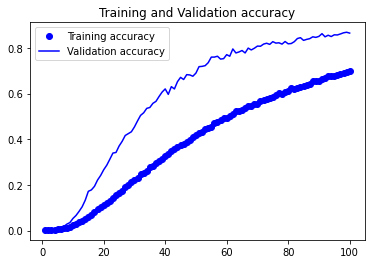

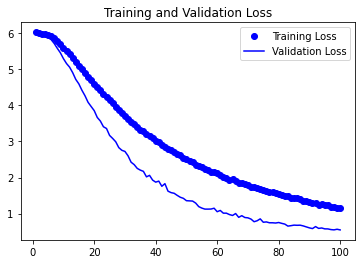

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [48]:
# let's see how it performs on the test set

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc: ', round(test_acc*100, 2),  '%')

50/50 [==============================] - 11s 221ms/step - loss: 0.4682 - acc: 0.8875
test acc:  88.75 %


All done. We reached a test accuracy of 89% on the test set.

### Evaluation

In [49]:
pred = model.predict(test_generator, steps=50)
pred.shape

(1600, 400)

In [51]:
# first, what are the names of the classes of birds

train_path = '../input/100-bird-species/train'
categories = []

for index, category_name in enumerate(sorted(os.listdir(train_path))):
    categories.append(category_name)

len(categories)

400

In [52]:
class_dict = dict(enumerate(categories))
print(class_dict)

{0: 'ABBOTTS BABBLER', 1: 'ABBOTTS BOOBY', 2: 'ABYSSINIAN GROUND HORNBILL', 3: 'AFRICAN CROWNED CRANE', 4: 'AFRICAN EMERALD CUCKOO', 5: 'AFRICAN FIREFINCH', 6: 'AFRICAN OYSTER CATCHER', 7: 'ALBATROSS', 8: 'ALBERTS TOWHEE', 9: 'ALEXANDRINE PARAKEET', 10: 'ALPINE CHOUGH', 11: 'ALTAMIRA YELLOWTHROAT', 12: 'AMERICAN AVOCET', 13: 'AMERICAN BITTERN', 14: 'AMERICAN COOT', 15: 'AMERICAN GOLDFINCH', 16: 'AMERICAN KESTREL', 17: 'AMERICAN PIPIT', 18: 'AMERICAN REDSTART', 19: 'AMETHYST WOODSTAR', 20: 'ANDEAN GOOSE', 21: 'ANDEAN LAPWING', 22: 'ANDEAN SISKIN', 23: 'ANHINGA', 24: 'ANIANIAU', 25: 'ANNAS HUMMINGBIRD', 26: 'ANTBIRD', 27: 'ANTILLEAN EUPHONIA', 28: 'APAPANE', 29: 'APOSTLEBIRD', 30: 'ARARIPE MANAKIN', 31: 'ASHY THRUSHBIRD', 32: 'ASIAN CRESTED IBIS', 33: 'AVADAVAT', 34: 'AZURE JAY', 35: 'AZURE TANAGER', 36: 'AZURE TIT', 37: 'BAIKAL TEAL', 38: 'BALD EAGLE', 39: 'BALD IBIS', 40: 'BALI STARLING', 41: 'BALTIMORE ORIOLE', 42: 'BANANAQUIT', 43: 'BAND TAILED GUAN', 44: 'BANDED BROADBILL', 45: 'BAN

In [53]:
# save the dict for future use
import pickle

with open('birds_dict.pickle', 'wb') as handle:
    pickle.dump(class_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [54]:
# let's run this on the first batch of images
images = test_generator[0][0]
images.shape

(32, 128, 128, 3)

In [57]:
# shape of array of one-hotencoded label of first image in first batch
labels = test_generator[0][1]
print(labels[0].shape)
print(labels[0]) # label for the first image

(400,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [58]:
# let's predict for first batch only

pred_proba = model.predict(images, steps=50) 
prediction = np.argmax(pred_proba, axis=1)
prediction = list(prediction)
print(prediction)

predicted_bird_specie = []
for index, val in enumerate(prediction):
    for key, value in class_dict.items():
        if val == key:
            predicted_bird_specie.append(class_dict[key])

print(predicted_bird_specie)

[290, 316, 363, 156, 267, 396, 147, 176, 397, 105, 3, 79, 354, 91, 358, 173, 300, 271, 226, 53, 257, 27, 346, 187, 31, 17, 277, 361, 350, 203, 146, 211]
['PALILA', 'RED HEADED DUCK', 'SWINHOES PHEASANT', 'EASTERN ROSELLA', 'MOURNING DOVE', 'WOOD DUCK', 'DOUBLE BARRED FINCH', 'FRIGATE', 'YELLOW BELLIED FLOWERPECKER', 'CHESTNET BELLIED EUPHONIA', 'AFRICAN CROWNED CRANE', 'BORNEAN LEAFBIRD', 'SPOTTED CATBIRD', 'CANARY', 'STRAWBERRY FINCH', 'FLAME BOWERBIRD', 'POMARINE JAEGER', 'NORTHERN CARDINAL', 'HYACINTH MACAW', 'BEARDED BARBET', 'MALACHITE KINGFISHER', 'ANTILLEAN EUPHONIA', 'SMITHS LONGSPUR', 'GOLDEN PHEASANT', 'ASHY THRUSHBIRD', 'AMERICAN PIPIT', 'NORTHERN MOCKINGBIRD', 'STRIPPED SWALLOW', 'SPANGLED COTINGA', 'GUINEA TURACO', 'DEMOISELLE CRANE', 'HAWAIIAN GOOSE']


In [59]:
# let's see the actual bird species
actual_bird_class = np.argmax(labels, axis=1)
actual_bird_class = list(actual_bird_class)
print(actual_bird_class)

actual_bird_specie = []
for index, val in enumerate(prediction):
    for key, value in class_dict.items():
        if val == key:
            actual_bird_specie.append(class_dict[key])

print(actual_bird_specie)

[290, 316, 221, 156, 267, 396, 147, 176, 33, 105, 3, 79, 4, 91, 358, 173, 300, 271, 226, 53, 257, 27, 346, 53, 31, 17, 277, 361, 350, 203, 146, 211]
['PALILA', 'RED HEADED DUCK', 'SWINHOES PHEASANT', 'EASTERN ROSELLA', 'MOURNING DOVE', 'WOOD DUCK', 'DOUBLE BARRED FINCH', 'FRIGATE', 'YELLOW BELLIED FLOWERPECKER', 'CHESTNET BELLIED EUPHONIA', 'AFRICAN CROWNED CRANE', 'BORNEAN LEAFBIRD', 'SPOTTED CATBIRD', 'CANARY', 'STRAWBERRY FINCH', 'FLAME BOWERBIRD', 'POMARINE JAEGER', 'NORTHERN CARDINAL', 'HYACINTH MACAW', 'BEARDED BARBET', 'MALACHITE KINGFISHER', 'ANTILLEAN EUPHONIA', 'SMITHS LONGSPUR', 'GOLDEN PHEASANT', 'ASHY THRUSHBIRD', 'AMERICAN PIPIT', 'NORTHERN MOCKINGBIRD', 'STRIPPED SWALLOW', 'SPANGLED COTINGA', 'GUINEA TURACO', 'DEMOISELLE CRANE', 'HAWAIIAN GOOSE']


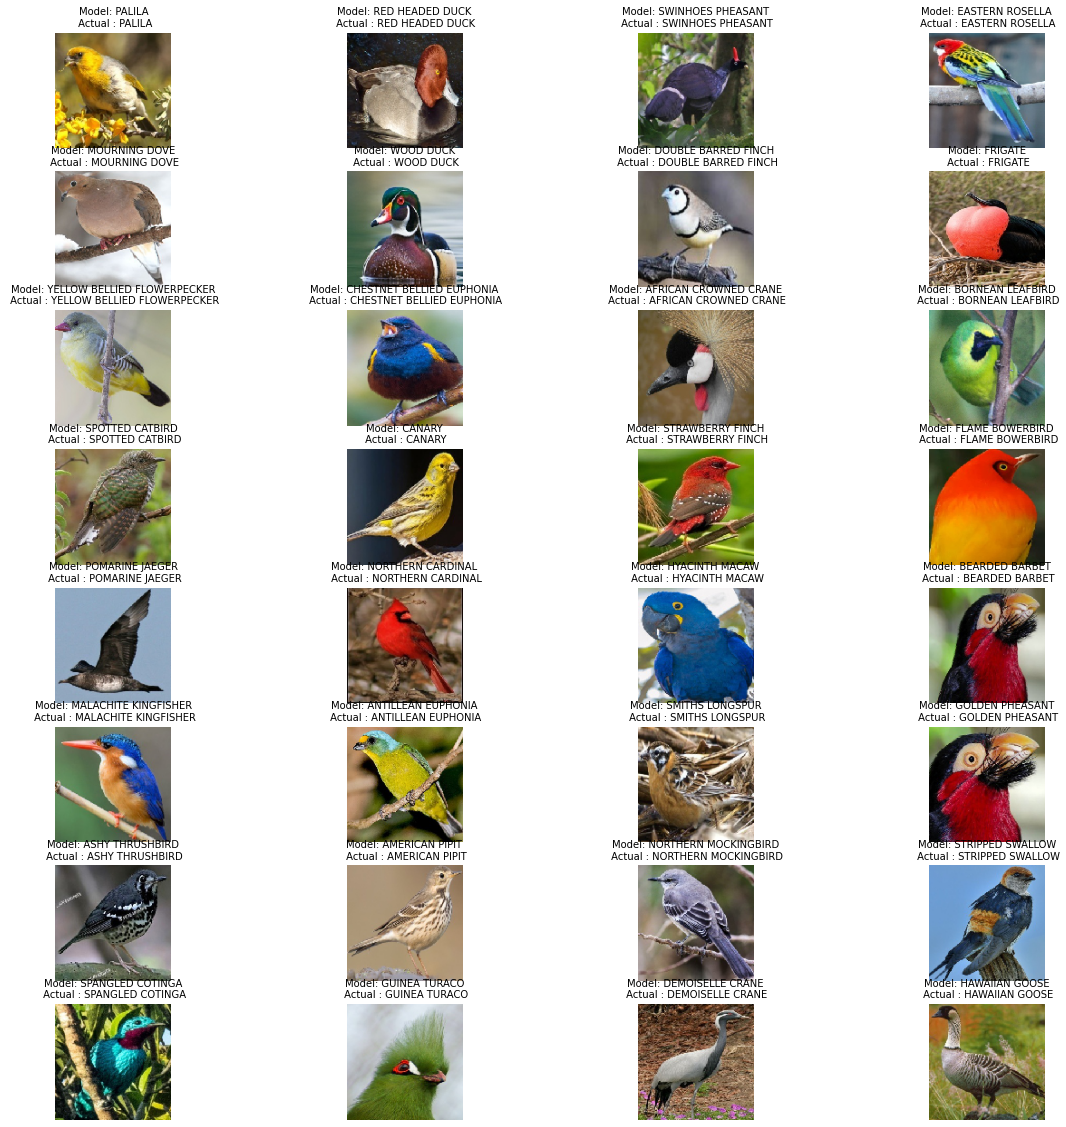

In [60]:
# now let's visualize:

# create the plot
plt.figure(figsize=(20, 20))

for i in range(len(images)):
  # create 32 subplots
  plt.subplot(8, 4, i + 1)

  # add each image to subplot and plot it
  image = images[i]
  plt.imshow(image)

  # add the predicted and actual specie name
  plt.title(f'Model: {predicted_bird_specie[i]}\n Actual : {actual_bird_specie[i]}',
            fontsize=10)
  plt.axis('off')
  
plt.show()

Let's write a function for this to work for a single image.

### Evaluate one picture

In [72]:
def evaluate(image_path, model_path, dict_path, image_height=128, image_width=128, n_channels=3):
    """Function for a python script to determine the specie of a given bird input
    Imports the necessary dependencies for the function to work anywhere.
    Args:
        image_path - path to the jpg file of the bird specie
        model_path - path to the h5 model file
        dict_path - path to the pickle dictionary for classes
        image_height/width - required shape for image. defaults to 150
        n_channels - 3 for rgb. 1 for black & white
    """
    # import dependencies
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # suppress tensorflow warnings
    import numpy as np
    import tensorflow as tf
    import matplotlib.pyplot as plt
    from tensorflow import keras
    from keras import models
    import pickle
    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    # load the model
    model = models.load_model(model_path)
    
    # load the dict
    with open('birds_dict.pickle', 'rb') as handle:
        class_dict = pickle.load(handle)
    
    # preprocess the image
    image = load_img(image_path, target_size=(image_height, image_width))

    # plot the image
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # convert image to array & clip to 0-1 range
    image = img_to_array(image)
    image = np.array(image)
    image = image[:]/255
    image = np.expand_dims(image, axis=0)

    # feed image to model & predict
    pred = model.predict(image)
    pred = np.argmax(pred, axis=1)
    
    for key, value in class_dict.items():
        if pred == key:
            predicted_bird_specie = class_dict[key]
            print(f"Model Predicted: {predicted_bird_specie}")
    plt.title(predicted_bird_specie)
    plt.show()

In [62]:
model_path = './birds_final_model.h5'
dict_path = './birds_dict.pickle'

Model Predicted: AFRICAN FIREFINCH


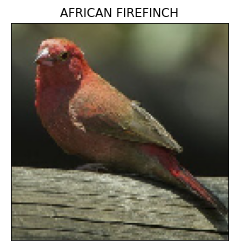

In [73]:
image_path = '../input/100-bird-species/images to test/1.jpg'
evaluate(image_path, model_path, dict_path)

Model Predicted: AFRICAN CROWNED CRANE


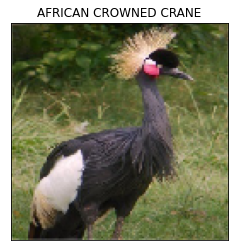

In [74]:
image_path = '../input/100-bird-species/images to test/3.jpg'
evaluate(image_path, model_path, dict_path)

Model Predicted: ANTBIRD


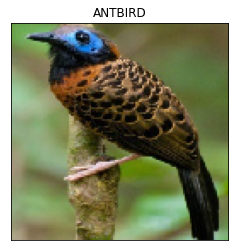

In [76]:
image_path = '../input/100-bird-species/images to test/7.jpg'
evaluate(image_path, model_path, dict_path)